<a href="https://colab.research.google.com/github/dreamerel/deep-learning-projects/blob/master/myfirstproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
mnist = tf.keras.datasets.mnist  #28*28 images of hand written digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


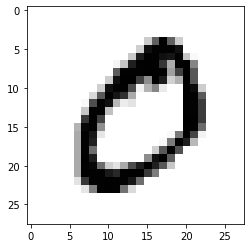

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [0]:
#  normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

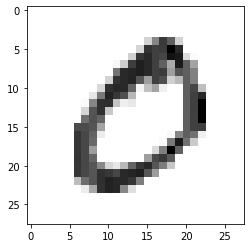

In [0]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [0]:
#create model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =  ['accuracy'])
model.fit(x_train, y_train, epochs = 4)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2626 - accuracy: 0.9238
Epoch 2/4
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1068 - accuracy: 0.9669
Epoch 3/4
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0727 - accuracy: 0.9766
Epoch 4/4
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0532 - accuracy: 0.9832


In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.0851 - accuracy: 0.9744
0.08514023982638028 0.9744


In [0]:
#save the model

model.save('mymodel.model')

INFO:tensorflow:Assets written to: mymodel.model/assets


In [0]:
new_model = tf.keras.models.load_model('mymodel.model')

In [0]:
#predict using our model

prediction = new_model.predict(x_test)

In [0]:
print(prediction)

[[6.0042842e-09 4.9067711e-10 1.5520352e-05 ... 9.9998403e-01
  1.1083213e-09 3.7959968e-08]
 [7.4285515e-07 5.1027069e-05 9.9994814e-01 ... 4.9895693e-10
  7.2951761e-10 1.1151537e-13]
 [5.2516462e-08 9.9986577e-01 1.0640261e-05 ... 2.1485312e-05
  7.0456561e-05 1.4745592e-06]
 ...
 [7.2392717e-11 7.2417726e-07 3.2286966e-08 ... 6.7723035e-06
  2.5740087e-06 2.4937541e-04]
 [4.4959557e-07 3.0409791e-07 1.3069255e-06 ... 1.7867875e-07
  1.4300710e-02 1.1126372e-09]
 [4.9822000e-09 3.5928696e-07 9.1190158e-09 ... 1.3131070e-10
  1.3048307e-06 5.1463660e-09]]


In [0]:
#let's check out how accurate our model can predict 
print(np.argmax(prediction[4]))

4


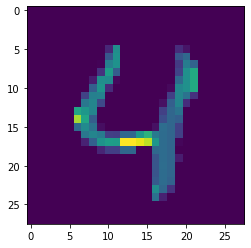

In [0]:

plt.imshow(x_test[4]) 